In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import requests
import time
import random
from bs4 import BeautifulSoup
list_years=[2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]
Dict_Url={}
Movies=[]
response_count=0
ignored=0
sleep_var=[8,9,10,11,12,13,14,15]
# ●	Loop through the years_url list to vary the release_date parameter of the URL
for i in list_years:
  url="https://www.imdb.com/search/title/?title_type=feature&year="+str(i)+"-01-01,"+str(i)+"-12-31&sort=year,asc&ref_=adv_prv"
  x= requests.get(url)
  Dict_Url[i]=url
  print(i)
  # ●	Pause the loop for a time interval between 8 and 15 seconds
  time.sleep(random.choice(sleep_var))
  # ●	For each element in years_url, loop through the pages list to vary the page parameter of the URL
  # limiting to first 10 pages
  for j in range(0,10):
    try:
      j=j*50+1
      page_url="https://www.imdb.com/search/title/?title_type=feature&year="+str(i)+"-01-01,"+str(i)+"-12-31&sort=year,asc&start="+str(j)+"&ref_=adv_prv"
      #print(page_url)
      y=requests.get(page_url)
      # ●	Throw a warning for non-200 status codes
      if (y.status_code!=200):
          print("response code is not 200")
          print(y)
      response_count+=1

    except requests.ConnectionError as e:
      print(e)
    # ●	Break the loop if the number of requests is greater than the 70 expected.
    if response_count>70:
        break
    # ● Parse the data with Beautiful Soup
    soup=BeautifulSoup(y.content,'html.parser')
    # ●	Convert the response‘s HTML content to a BeautifulSoup object
    films=soup.findAll("div",{"class":"lister-item mode-advanced"})
    # ●	Loop through all these containers
    for k in films:
      # ●	Extract the data if a container has a Metascore
      if k.find('div',{"class":"inline-block ratings-metascore"}) is None:
        ignored+=1
      else:
        movie_name=k.h3.a.text.strip()
        movie_year=k.h3.find("span",{"class":"lister-item-year text-muted unbold"}).text.strip("V,I, ,()")
        if k.find('div',{"class":"inline-block ratings-imdb-rating"}) is None:
          movie_rating="NA"
        else:
          movie_rating=float(k.find('div',{"class":"inline-block ratings-imdb-rating"}).strong.text)
        movie_metascore=int(k.find('div',{"class":"inline-block ratings-metascore"}).span.text.strip())

        Movies.append({"Movie Name":movie_name,"Year":movie_year,"IMDB Rating":movie_rating,"Metascore":movie_metascore})
  if response_count>70:
    print("breaking loop as the request count has exceeded 70")
    print("Response Count=" + str(response_count))
    break
# ●	Create a Pandas Dataframe to hold the info scraped (movie, years imdb_ratings, metascore, votes)
Movie_df=pd.DataFrame(Movies)
Movie_df
# ●	Write the Pandas Dataframe to a CSV
Movie_df.to_csv('Movies - Imdb.csv',index=False)
print("The no of movies ignored due to missing metascore:"+str(ignored))
Movie_df



2010
2011
2012
2013
2014
2015
2016
2017
breaking loop as the request count has exceeded 70
Response Count=71
The no of movies ignored due to missing metascore:1069


,Movie Name,Year,IMDB Rating,Metascore
0,Inception,2010,8.8,74
1,Black Swan,2010,8.0,79
2,Burlesque,2010,6.4,47
3,Easy A,2010,7.0,72
4,Shutter Island,2010,8.2,63
...,...,...,...,...
2426,After the Storm,2016,7.3,84
2427,Battle for Incheon: Operation Chromite,2016,6.2,50
2428,The Ornithologist,2016,6.3,85
2429,Swallows and Amazons,2016,6.1,65


●	Use matplotlib to create two histograms to visually compare the average IMDB rating to the average metascore rating (15 Marks)

Text(0.5, 1.0, 'Metascore - Histogram')

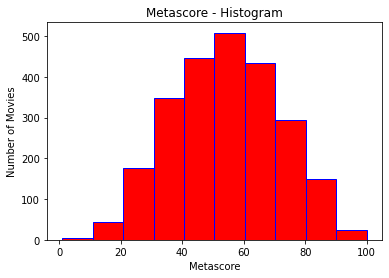

In [ ]:
plt.hist(Movie_df["Metascore"],color='red',ec='blue')
plt.xlabel('Metascore')
plt.ylabel('Number of Movies')
plt.title('Metascore - Histogram')

Text(0.5, 1.0, 'IMDB Rating - Histogram')

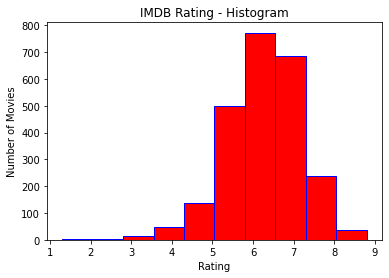

In [ ]:
plt.hist(Movie_df["IMDB Rating"],color='red',ec='blue')
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.title('IMDB Rating - Histogram')


11